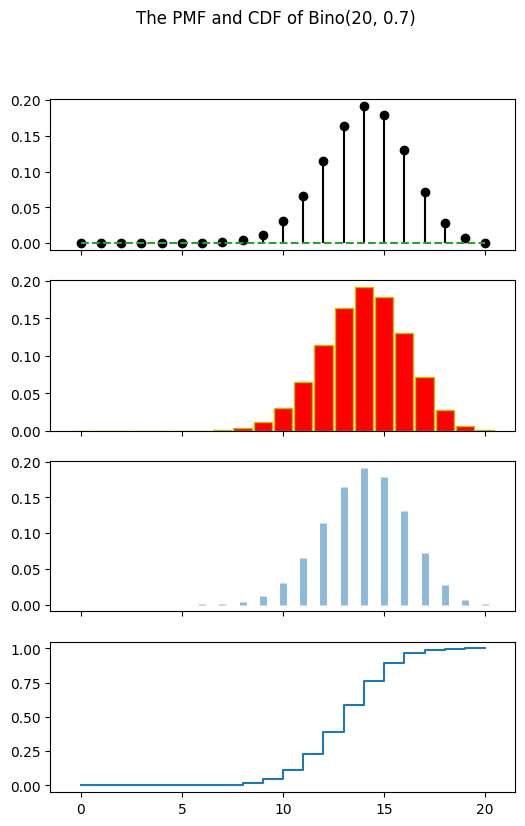

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
 
n, p = 20, 0.7
x = np.arange(n + 1)
y = binom.pmf(x, n, p)
fig, ax = plt.subplots(4,1, sharex = 'col', figsize = [6, 9])
ax[0].stem(x, y, linefmt='k-', markerfmt='ko', basefmt = 'C2--')
ax[1].bar(x, y, width = 0.9, color = 'r', edgecolor = 'y' )
ax[2].vlines(x, 0, y, lw = 5, alpha = 0.5)
Y = binom.cdf(x, n, p)
ax[3].plot(x, Y, drawstyle = 'steps-pre')
plt.suptitle('The PMF and CDF of Bino({}, {})'.format(n, p))
plt.show()

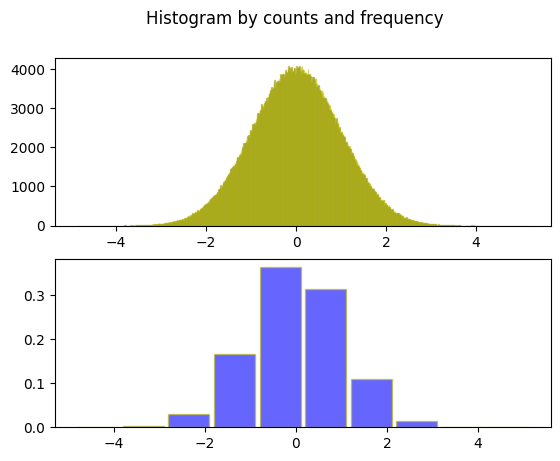

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
 
# random number generator with random seed
rng = np.random.default_rng() # (seed=...)
x = rng.normal(loc = 0, scale = 1, size = 1000000)
# x = norm.rvs(loc = 0, scale = 1, size = 1000)
 
fig, (ax1, ax2) = plt.subplots(2, 1)
# typical histogram by counts 
ax1.hist(x, bins = 1000, alpha = 0.6, color = 'b', edgecolor = 'y', linewidth = 1)
# histogram by frequency 
ax2.hist(x, bins = 10, alpha = 0.6, color = 'b', edgecolor = 'y', linewidth = 1, density = True, rwidth = 0.9)
plt.suptitle('Histogram by counts and frequency')
plt.show()


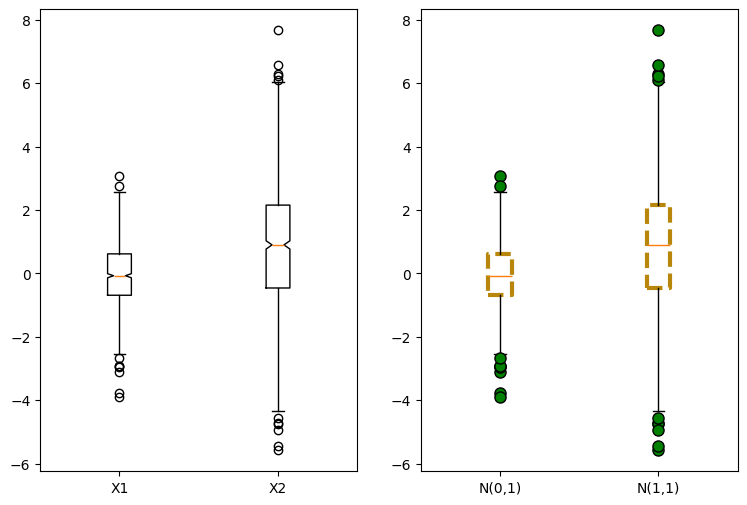

In [16]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
 
rng = np.random.default_rng(0) # seed is fixed
n = 1000 # sampe size
x1 = norm.rvs(size = n, random_state = rng) # standard normal
x2 = norm.rvs(loc = 1, scale = 2, size = n)
# run a few times and check the random numbers generated 
# with and without fixing the random seed.
# print(x1[0:3])
# print(x2[0:3])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 6))
x = np.c_[x1, x2]
ax1.boxplot(x, notch = True, vert = True, labels = ['X1','X2'])
# plt.show()
 
# use boxplot properties
boxprops = dict(linestyle = '--', linewidth = 3, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 8, linestyle = 'none') # define outliers
labels = ['N(0,1)','N(1,1)']
ax2.boxplot(np.c_[x1, x2], boxprops = boxprops,
    flierprops = flierprops, labels = labels)
plt.show()

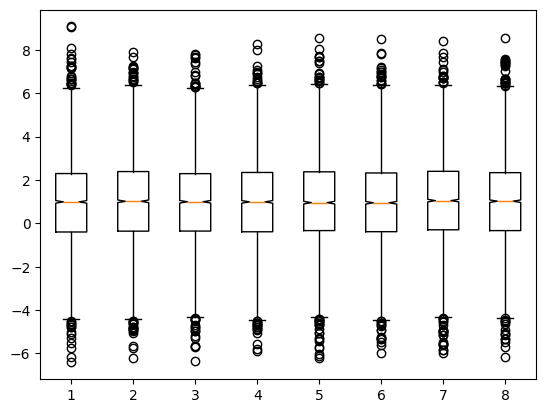

In [22]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
 
n = 5000
X = norm.rvs(loc = 1, scale = 2, size = (n,8))
plt.boxplot(X, notch = True, vert = True)
plt.show()

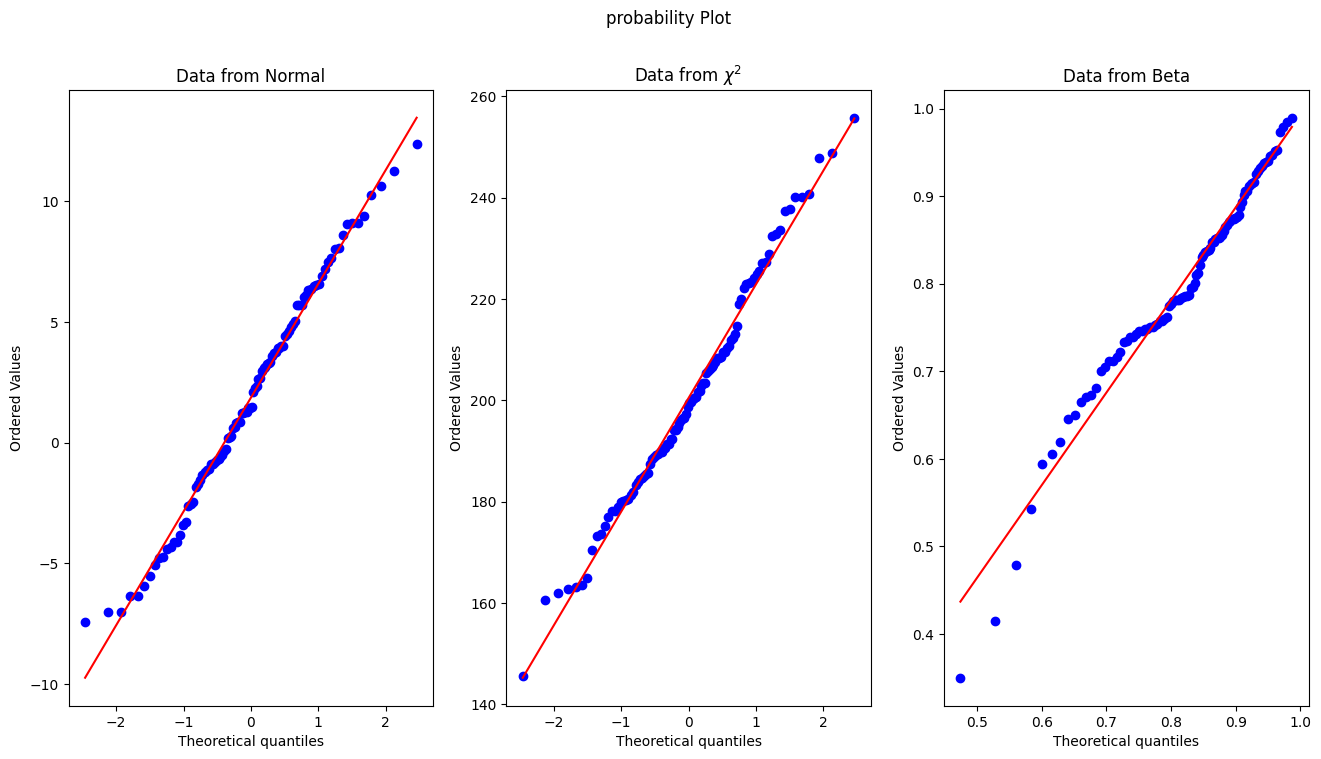

In [28]:
import numpy as np
import scipy.stats as stats
 

x1 = np.random.normal(loc = 2, scale = 5, size=100) 
x2 = np.random.chisquare(df = 200, size = 100)
x3 = np.random.beta(a = 9, b = 2, size = 100)
 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 8))
stats.probplot(x1, dist = "norm", plot = ax1)
stats.probplot(x2, dist = "norm", plot = ax2)
stats.probplot(x3, dist = "beta", sparams = (9, 2), plot = ax3)
# stats.probplot(x2, dist = "chi2", sparams = 2, plot = ax2)
ax1.set_title('Data from Normal')
ax2.set_title('Data from $\chi^2$')
ax3.set_title('Data from Beta')
plt.suptitle('probability Plot')    
plt.show()

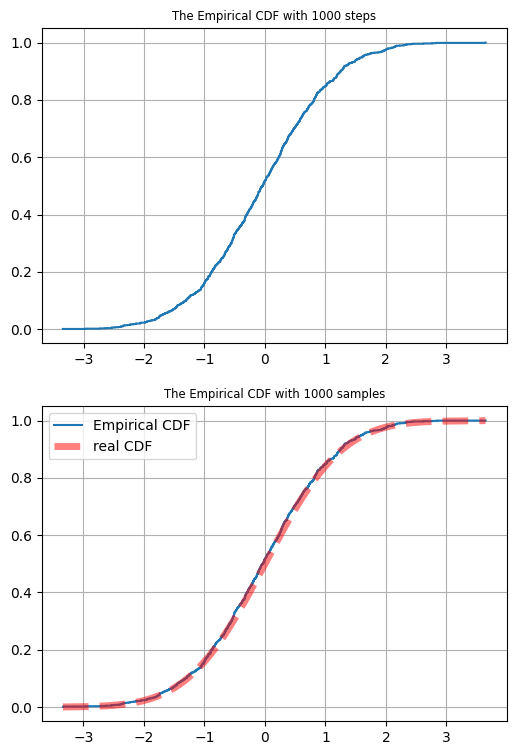

In [30]:
import numpy as np
from scipy.stats import norm
from scipy.stats import cumfreq  # for ECDF
 
n = 1000
sample = norm.rvs(size = n)
# Approach 1
num_bins = n # cumulative frequency over each sample
res = cumfreq(sample, num_bins)
# print(res.lowerlimit, res.binsize, res.cumcount.size)
x = res.lowerlimit + np.linspace(0,
    res.binsize * res.cumcount.size, res.cumcount.size)
 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6, 9))
# ax1.bar(x, res.cumcount/n, width=res.binsize)
ax1.plot(x, res.cumcount/n, drawstyle = 'steps-pre')
ax1.set_title('The Empirical CDF with {} steps'.format(num_bins), fontsize = 'small')
ax1.grid(True)
 
# Approach 2
x = np.sort(sample)
Y = np.arange(1, n+1) / n
ax2.plot(x, Y, drawstyle = 'steps-pre', label = 'Empirical CDF')
# draw the theoretical CDF of Z
Y_ = norm.cdf(x)
ax2.plot(x, Y_, color = 'r', linestyle = '--',
    linewidth = 5, alpha = 0.5, label = 'real CDF')
ax2.legend(), plt.grid(True)
ax2.set_title('The Empirical CDF with {} samples'.format(num_bins), fontsize = 'small')
plt.show()

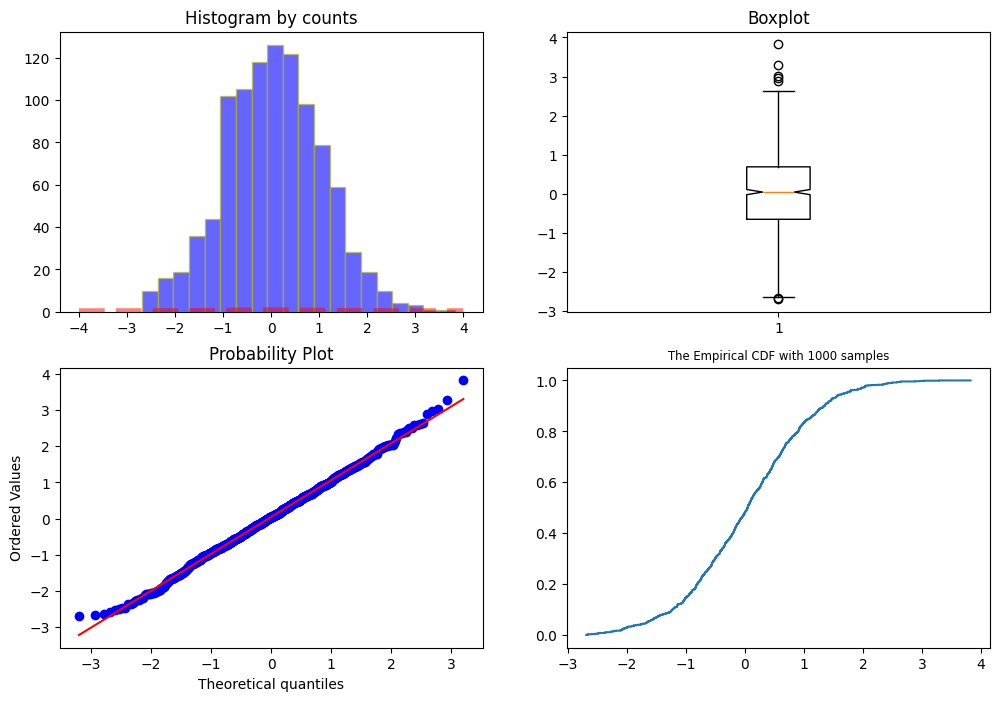

In [51]:
import numpy as np
from scipy.stats import norm
from scipy.stats import cumfreq  # for ECDF
import matplotlib.pyplot as plt

n = 1000
x = norm.rvs(size = n)
fig,ax = plt.subplots(2,2,figsize = (12,8))
ax[0,0].hist(x, bins = 20, alpha = 0.6, color = 'b', edgecolor = 'y', linewidth = 1)
xx = np.linspace(-4, 4, 100)
yy = norm.pdf(xx)
ax[0,0].plot(xx, yy, color = 'r', linestyle = '--', linewidth = 5, alpha = 0.5)
ax[0,0].set_title('Histogram by counts')

ax[0,1].boxplot(x, notch = True, vert = True)
ax[0,1].set_title('Boxplot')
stats.probplot(x, dist = "norm", plot = ax[1,0])
ax[1,0].set_title('Probability Plot')

x = np.sort(x)
Y = np.arange(1, n+1) / n
ax[1,1].plot(x, Y, drawstyle = 'steps-pre', label = 'Empirical CDF')
ax[1,1].set_title('The Empirical CDF with {} samples'.format(num_bins), fontsize = 'small')

plt.show()